In [63]:
import pandas as pd
from dataprep.eda import plot,plot_missing
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.features.pca import PCADecomposition
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('fifa2019.csv')

In [3]:
lista_final = {}

In [4]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [5]:
df.shape

(18207, 89)

In [6]:
df._get_numeric_data().columns

Index(['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [7]:
X = df._get_numeric_data()

In [8]:
plot_missing(X)

In [9]:
X[X.isnull().any(axis=1)].head()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
5018,5018,153160,37,70,70,1574,1.0,3.0,2.0,NaN,...,77.0,64.0,79.0,70.0,70.0,16.0,8.0,11.0,12.0,13.0
6736,6736,175393,33,68,68,1664,1.0,3.0,3.0,NaN,...,69.0,67.0,12.0,34.0,33.0,16.0,13.0,15.0,16.0,8.0
7922,7922,195905,33,67,67,1619,1.0,3.0,2.0,NaN,...,42.0,54.0,72.0,71.0,64.0,11.0,7.0,8.0,12.0,12.0
9905,9905,226044,23,66,69,1632,1.0,4.0,3.0,NaN,...,67.0,64.0,19.0,24.0,23.0,13.0,11.0,11.0,7.0,9.0
10628,10628,216751,26,65,66,1536,1.0,2.0,2.0,NaN,...,39.0,57.0,68.0,69.0,68.0,14.0,12.0,11.0,14.0,12.0


In [10]:
X = X.drop(columns=['Jersey Number'])

In [11]:
X[X.isnull().any(axis=1)].head()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
13236,13236,177971,33,62,62,1510,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,13237,195380,29,62,62,1532,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,13238,139317,35,62,62,1573,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,13239,240437,20,62,72,1610,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,13240,209462,24,62,66,1481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
X = X.dropna()

In [14]:
mask = (df['ID'].isin(X['ID']))
df = df.loc[mask,:]

In [15]:
X.columns

Index(['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [16]:
X = X.drop(columns=['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special','International Reputation'])

In [17]:
hierarchical = AgglomerativeClustering(n_clusters=4, affinity='correlation', linkage='complete')
hierarchical.fit(X)

AgglomerativeClustering(affinity='correlation', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [18]:
df['labels'] = hierarchical.labels_

In [19]:
for label in df['labels'].unique():
    print(label)
    print(df.query(f'labels == {label}')['Position'].value_counts())

2
ST     2124
RM      953
LM      934
CAM     828
CM      455
LW      361
RW      354
LS      205
RS      199
LCM     113
RCM     100
CF       72
RB       65
LB       60
LDM      32
RDM      27
CDM      25
LAM      21
RAM      18
RF       14
LF       13
RWB       9
LWB       7
CB        4
RCB       1
LCB       1
Name: Position, dtype: int64
1
GK    2025
Name: Position, dtype: int64
3
CM     101
CDM     76
CAM     51
RCM     45
LCM     43
CB      35
LDM     27
RDM     20
RM      17
LCB     13
LM      13
RCB     11
LB       8
RB       7
ST       5
RAM      2
LW       2
LS       1
CF       1
RW       1
LF       1
RF       1
Name: Position, dtype: int64
0
CB     1739
LB     1254
RB     1219
CDM     847
CM      838
RCB     650
LCB     634
RCM     246
LCM     239
RDM     201
LDM     184
RM      154
LM      148
CAM      79
RWB      78
LWB      71
ST       23
LW       18
RW       15
RS        4
LS        1
RF        1
LF        1
RAM       1
CF        1
Name: Position, dtype: int64


In [20]:
df_ataque = df.query('labels == 2')
df_goleiro = df.query('labels == 1')
df_meio = df.query('labels == 3')
df_zaga = df.query('labels == 0')

# Goleiros

In [79]:
X = df_goleiro._get_numeric_data()

In [80]:
X.columns

Index(['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'labels',
       'pc1', 'pc2'],
      dtype='object')

In [81]:
X = X[['GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]
X_std = StandardScaler().fit_transform(X)

In [82]:
pca = PCA(2)
X_t = pca.fit_transform(X_std)
pca.explained_variance_ratio_.sum()

0.9050696298650946

In [84]:
X_t[:,1]

array([-0.44719362,  0.38714361, -0.86110386, ...,  0.19766776,
       -0.64603692, -1.39503768])

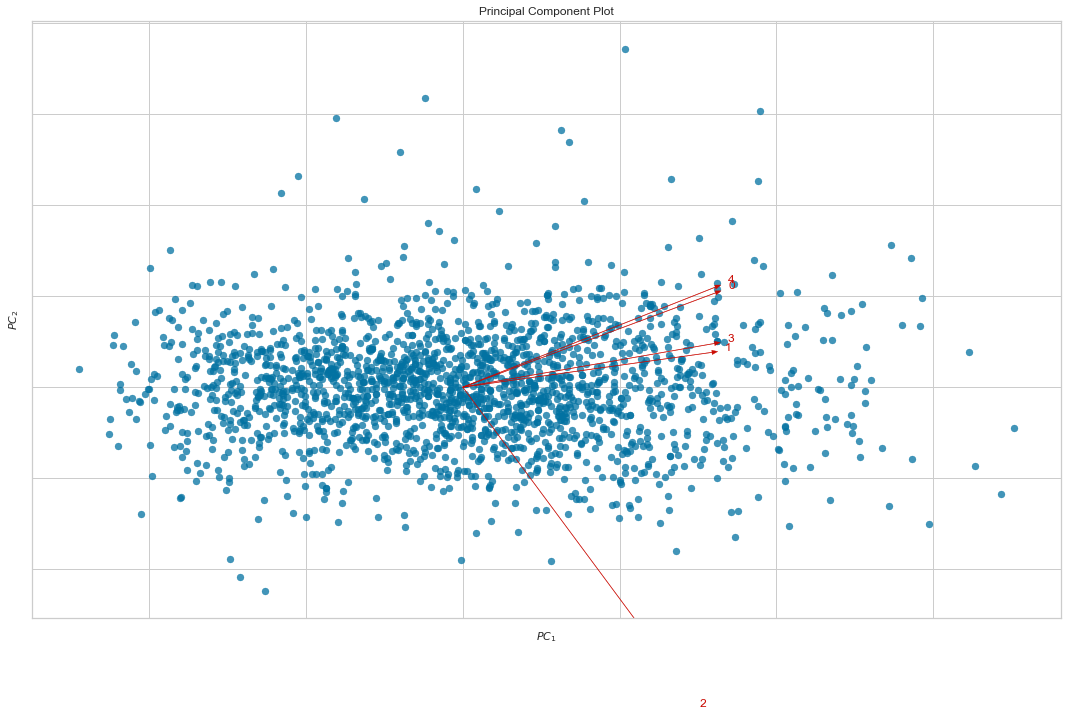

In [96]:
visualizer = PCADecomposition(scale=True, proj_features=True,)
visualizer.fit_transform(pd.DataFrame(X_std))
visualizer.show()

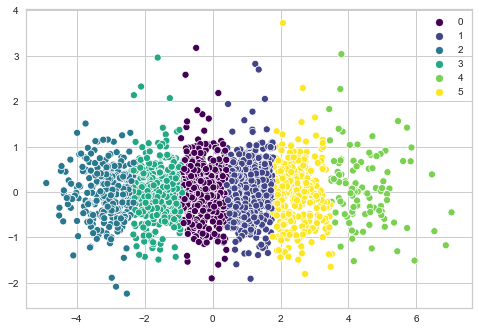

In [93]:
cluster = KMeans(n_clusters=6,random_state=42).fit(X_std)
labels= cluster.labels_
sns.scatterplot(X_t[:, 0], X_t[:, 1], hue=labels,s=50, palette='viridis', legend='full')

In [97]:
df_goleiro['label_1'] = labels

In [98]:
df_goleiros_best = df_goleiro.query('label_1 == 4')

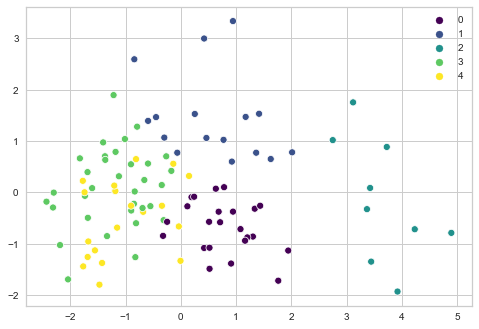

In [104]:
X = df_goleiros_best._get_numeric_data()
X = X[['GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]
X_std = StandardScaler().fit_transform(X)
pca = PCA(2)
X_t = pca.fit_transform(X_std)
cluster = KMeans(n_clusters=5,random_state=42).fit(X_std)
labels= cluster.labels_
sns.scatterplot(X_t[:, 0], X_t[:, 1], hue=labels,s=50, palette='viridis', legend='full')

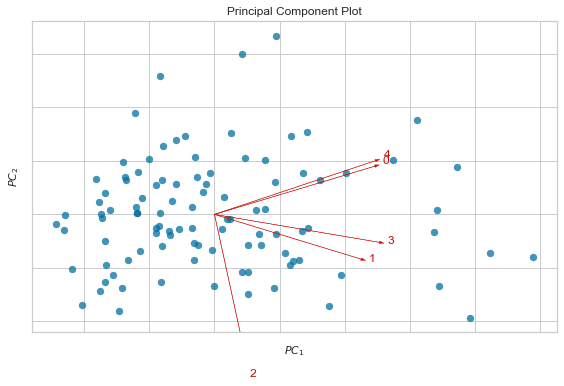

In [106]:
visualizer = PCADecomposition(scale=True, proj_features=True)
visualizer.fit_transform(pd.DataFrame(X_std))
visualizer.show()

In [108]:
df_goleiros_best['label'] = labels

In [110]:
df_goleiros_best.query('label == 2')

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,labels,pc1,pc2,label_1,label
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,85.0,87.0,88.0,94.0,€138.6M,1,55.891816,-3.528399,4,2
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,92.0,78.0,88.0,89.0,€144.5M,1,51.215644,2.406899,4,2
18,18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,...,85.0,88.0,85.0,90.0,€123.3M,1,51.554823,-6.832043,4,2
19,19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,...,91.0,72.0,86.0,88.0,€113.7M,1,46.550286,6.947837,4,2
22,22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,...,86.0,91.0,87.0,87.0,€62.7M,1,54.060481,-9.377677,4,2
37,37,167948,H. Lloris,31,https://cdn.sofifa.org/players/4/19/167948.png,France,https://cdn.sofifa.org/flags/18.png,88,88,Tottenham Hotspur,...,84.0,68.0,83.0,92.0,€66.6M,1,43.770615,11.811449,4,2
40,40,162835,S. Handanovič,33,https://cdn.sofifa.org/players/4/19/162835.png,Slovenia,https://cdn.sofifa.org/flags/44.png,88,88,Inter,...,86.0,69.0,89.0,89.0,€51M,1,46.136823,10.571597,4,2
41,41,1179,G. Buffon,40,https://cdn.sofifa.org/players/4/19/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,88,88,Paris Saint-Germain,...,87.0,74.0,90.0,83.0,€7.4M,1,46.609985,4.639144,4,2
46,46,193041,K. Navas,31,https://cdn.sofifa.org/players/4/19/193041.png,Costa Rica,https://cdn.sofifa.org/flags/72.png,87,87,Real Madrid,...,81.0,75.0,82.0,90.0,€62.5M,1,44.665030,5.095652,4,2


In [111]:
lista_final['goleiros'] = list(df_goleiros_best.query('label == 2')['Name'])

# Defesa

In [48]:
X = df_zaga._get_numeric_data()

In [49]:
X.columns

Index(['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'labels',
       'labels_new'],
      dtype='object')

In [50]:
X = X.drop(columns=['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special','International Reputation'])

In [51]:
X = X.drop(columns=['Jersey Number','GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'labels'])

In [52]:
X_std = StandardScaler().fit_transform(X)

In [55]:
hierarchical = AgglomerativeClustering(n_clusters=2, affinity='correlation', linkage='complete')
hierarchical.fit(X)

AgglomerativeClustering(affinity='correlation', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [56]:
df_zaga['labels_new'] = hierarchical.labels_
for label in df_zaga['labels_new'].unique():
    print(label)
    print(df_zaga.query(f'labels_new == {label}')['Position'].value_counts())

1
LB     1141
RB     1105
CM      811
CDM     719
CB      268
RCM     232
LCM     223
RDM     177
LDM     156
RM      151
LM      146
LCB     119
RCB     101
RWB      76
CAM      74
LWB      66
LW       18
ST       17
RW       15
RS        4
LS        1
RF        1
LF        1
RAM       1
CF        1
Name: Position, dtype: int64
0
CB     1471
RCB     549
LCB     515
CDM     128
RB      114
LB      113
LDM      28
CM       27
RDM      24
LCM      16
RCM      14
ST        6
LWB       5
CAM       5
RM        3
LM        2
RWB       2
Name: Position, dtype: int64


C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
df_laterais = df_zaga.query('labels_new == 1')
df_zagueiros = df_zaga.query('labels_new == 0')

## Laterais

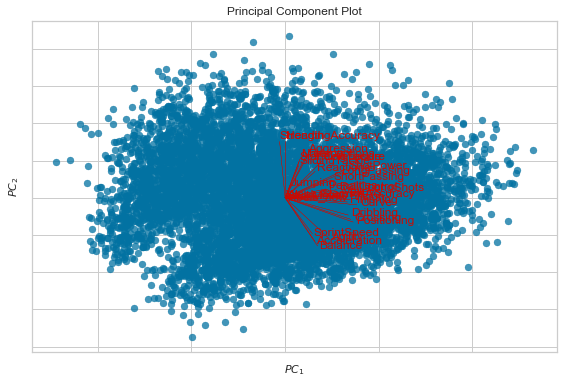

In [121]:
X = df_zaga._get_numeric_data()
X = X.drop(columns=['Unnamed: 0', 'ID', 'Age', 'Overall', 'Potential', 'Special','International Reputation'])
X = X.drop(columns=['Jersey Number','GKDiving','GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'labels'])
X_std = StandardScaler().fit_transform(X)
pca = PCA(2)
X_t = pca.fit_transform(X_std)
pca.explained_variance_ratio_.sum()
visualizer = PCADecomposition(scale=False, proj_features=True)
visualizer.fit_transform(pd.DataFrame(X))
visualizer.show()